In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv', low_memory=False)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv('test.csv', low_memory=False)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#check the null values of training data
train.isnull().sum()
#cabin in missing 687
#embarked is missing 2
#age is missing 177

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0,0.5,'Survival Count')

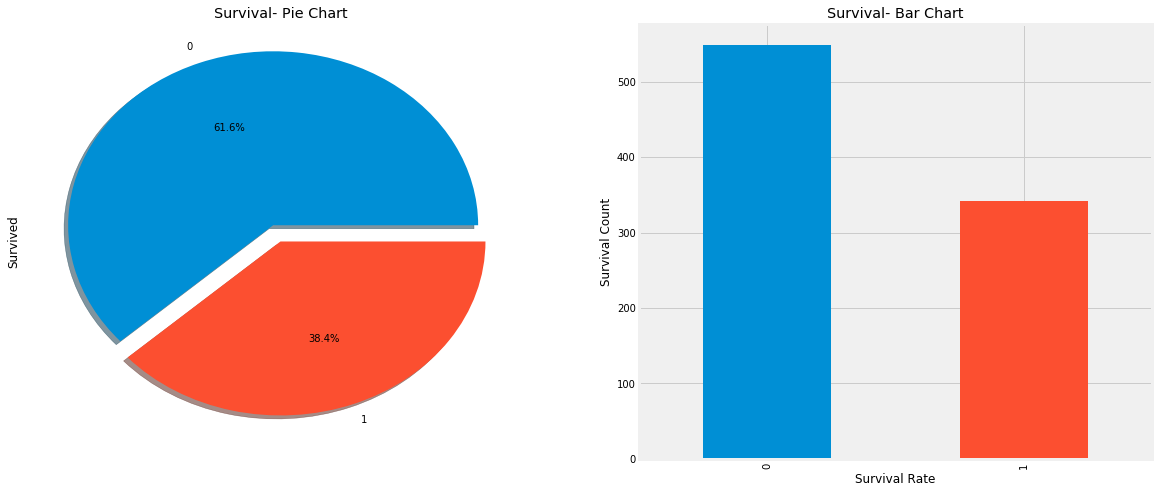

In [40]:
plt.subplots(figsize=(18,8))
plt.subplot(1, 2, 1)
train.Survived.value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.title('Survival- Pie Chart')


plt.subplot(1, 2, 2)
train.Survived.value_counts().plot(kind='bar')
plt.title('Survival- Bar Chart')
plt.xlabel('Survival Rate')
plt.ylabel('Survival Count')

#It is evident that not many passengers survived the accident.

# Out of 891 passengers in training set, only around 350 survived i.e 
# Only 38.4% of the total training set survived the crash. We need to dig down more to get better 
# insights from the data and see which categories of the passengers did survive and who didn't.
# We will try to check the survival rate by using the different features of the dataset.
# Some of the features being Sex, Port Of Embarcation, Age,etc.
# First let us understand the different types of features.

## Analyzing Sex- Categorical Variable

In [33]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

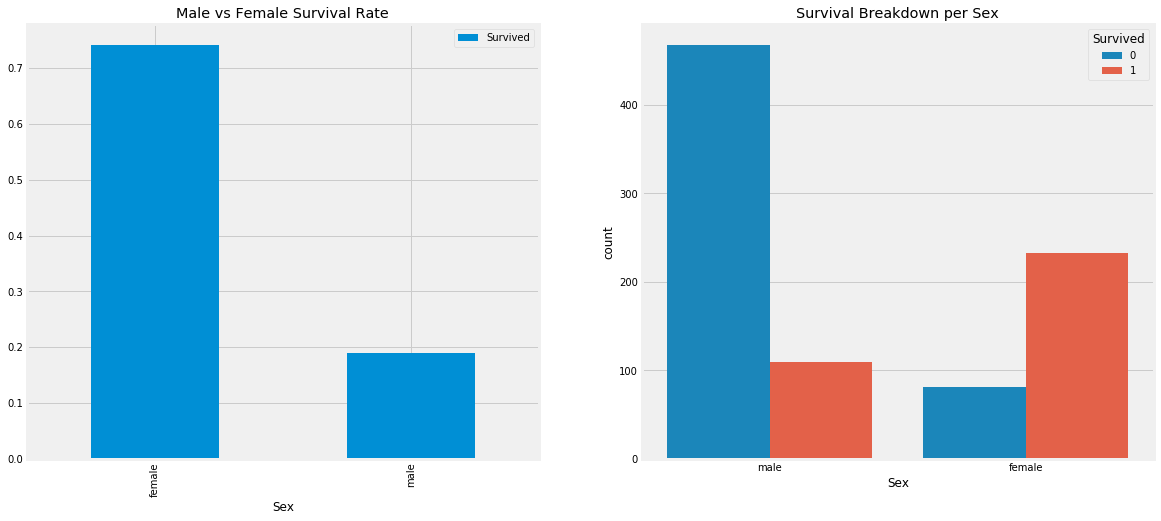

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot('Sex',data=train,hue='Survived',ax=ax[1])
ax[1].set_title('Survival Breakdown per Sex')

train[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar',ax=ax[0])
ax[0].set_title('Male vs Female Survival Rate')
plt.show()


## Plcass vs survival

In [55]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

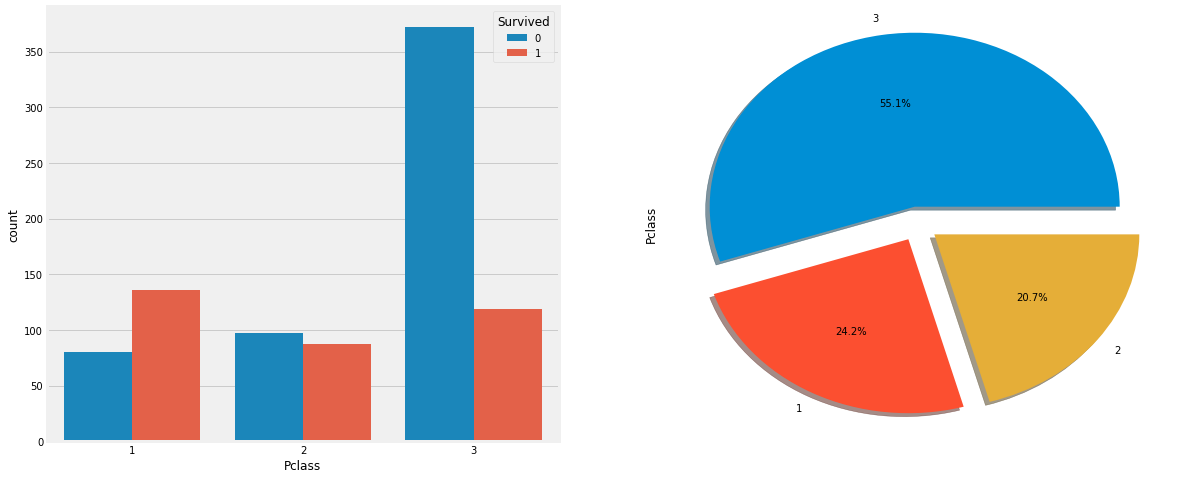

In [67]:
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',data=train,hue='Survived',ax=ax[0])
train.Pclass.value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,ax=ax[1])

In [69]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

## Age -Continuous 

In [71]:
#lets find the youngest, oldest, and the average ages of the passenter
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
print('The oldest person was:', train.Age.max(),'years old')
print('The youngest person was:', round(train.Age.min(),2),'years old')
print('The average age was:', round(train.Age.mean(),2),'years old')


The oldest person was: 80.0 years old
The youngest person was: 0.42 years old
The average age was: 29.7 years old


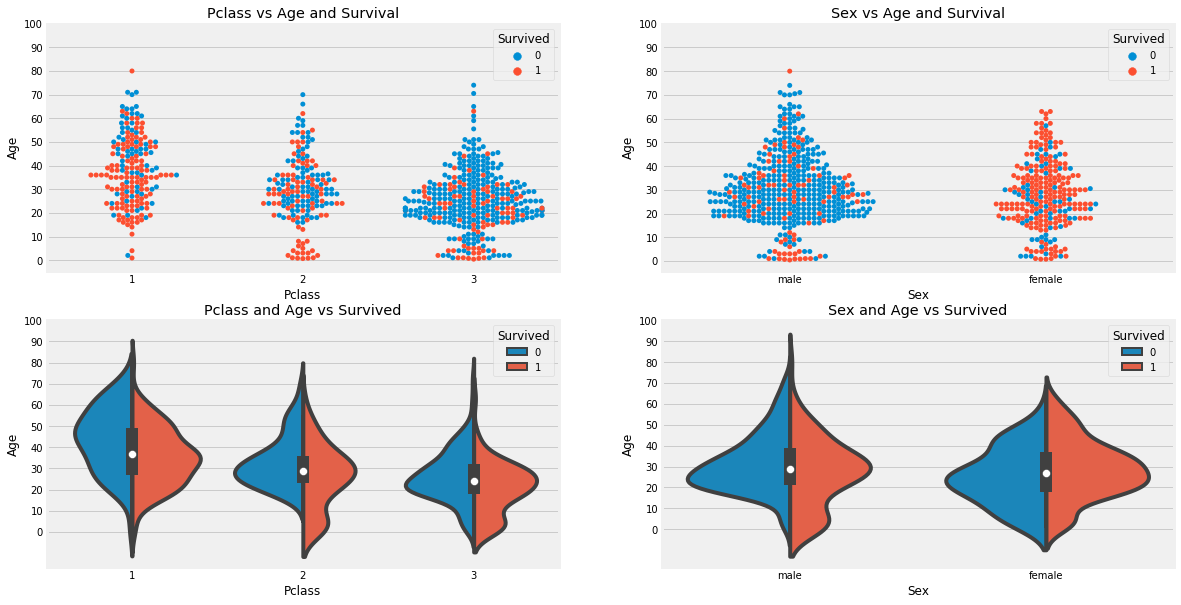

In [96]:
#lets look at age and passenger vs survival & age and sex vs survival
f,ax=plt.subplots(2,2,figsize=(18,10))
sns.swarmplot('Pclass','Age',data=train,ax=ax[0,0],hue='Survived')
ax[0,0].set_title('Pclass vs Age and Survival')
ax[0,0].set_yticks(range(0,110,10))

sns.swarmplot('Sex','Age',data=train,ax=ax[0,1],hue='Survived')
ax[0,1].set_title('Sex vs Age and Survival')
ax[0,1].set_yticks(range(0,110,10))

sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[1,0])
ax[1,0].set_title('Pclass and Age vs Survived')
ax[1,0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1,1])
ax[1,1].set_title('Sex and Age vs Survived')
ax[1,1].set_yticks(range(0,110,10))

plt.show()


In [99]:
# we should see if we can replace the missing age values or impute them with an average value

for i in train:
    train['Title']=train.Name.str.extract('([A-Za-z]+)\.')
train.Title.head()


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [103]:
pd.crosstab(train.Title,train.Sex,).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
